<a href="https://colab.research.google.com/github/MiguelAngel-ht/Notas-Introduccion-a-la-IA/blob/main/10-Transferencia-de-Aprendizaje/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transferencia de Aprendizaje


Subiendo carpetas comprimidas con los nombre:

*   tenis.zip
*   outdoor.zip
*   zapatillas.zip

para luego descomprimir en el ambiente de colab.



In [5]:
from google.colab import output

In [6]:
!unzip tenis/tenis.zip -d tenis
!unzip zapatillas/zapatillas.zip -d zapatillas
!unzip outdoor/outdoor.zip -d outdoor

output.clear()
print('Listo')

Listo


In [7]:
!rm -rf tenis/tenis.zip
!rm -rf zapatillas/zapatillas.zip
!rm -rf outdoor/outdoor.zip

output.clear()
print('Listo')

Listo


In [8]:
#Crear un set de datos (ya no en memoria)

!mkdir dataset
!cp -r tenis dataset/tenis
!cp -r zapatillas dataset/zapatillas
!cp -r outdoor dataset/outdoor

output.clear()
print('Listo')

Listo


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Con esta técnica de aquí, aumentaremos el dataset que tenemos para generar más imágenes en diferentes ángulos y posiciones para un mejor entrenamiento.

In [10]:
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 1226 images belonging to 3 classes.
Found 304 images belonging to 3 classes.


In [24]:
import matplotlib.pyplot as plt

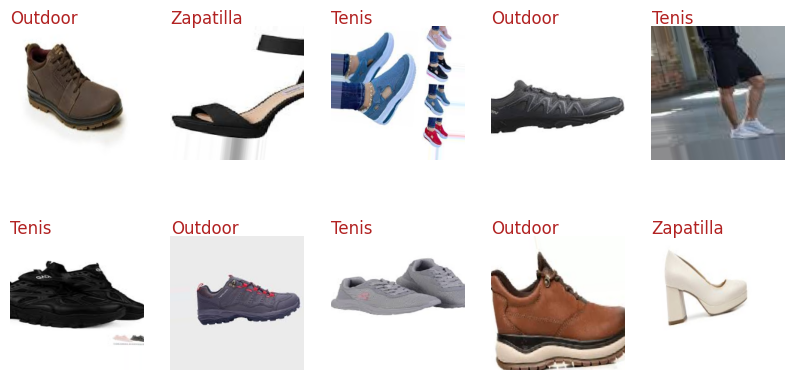

In [23]:
plt.figure(figsize=(10, 5))

#clases = ['Tenis', 'Zapatilla', 'Outdoor']
clases = ['Outdoor','Tenis', 'Zapatilla']

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(imagenes[i])
    plt.text(0, -5, clases[np.argmax(etiquetas[i])], color='firebrick', fontsize=12)

  break
plt.show()

In [25]:
import tensorflow as tf
import tensorflow_hub as hub

# Modelo pre-entrenado
url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [26]:
# Importante
# Congelar las capas
mobilenetv2.trainable = False

In [31]:
# Crear modelo
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation="softmax")
])

In [32]:
# Compilar modelo
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [33]:
# Entrenamiento del modelo

EPOCAS = 10
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/10
39/39 [==============================] - 49s 735ms/step - loss: 0.7788 - accuracy: 0.6582 - val_loss: 0.4564 - val_accuracy: 0.8125
Epoch 2/10
39/39 [==============================] - 24s 602ms/step - loss: 0.4157 - accuracy: 0.8369 - val_loss: 0.3437 - val_accuracy: 0.8618
Epoch 3/10
39/39 [==============================] - 26s 677ms/step - loss: 0.3565 - accuracy: 0.8613 - val_loss: 0.2972 - val_accuracy: 0.8947
Epoch 4/10
39/39 [==============================] - 22s 577ms/step - loss: 0.3156 - accuracy: 0.8785 - val_loss: 0.2544 - val_accuracy: 0.9243
Epoch 5/10
39/39 [==============================] - 22s 573ms/step - loss: 0.2805 - accuracy: 0.8899 - val_loss: 0.2310 - val_accuracy: 0.9013
Epoch 6/10
39/39 [==============================] - 22s 580ms/step - loss: 0.2832 - accuracy: 0.8842 - val_loss: 0.2608 - val_accuracy: 0.9112
Epoch 7/10
39/39 [==============================] - 22s 580ms/step - loss: 0.2498 - accuracy: 0.9111 - val_loss: 0.2245 - val_accuracy: 0.9276

In [48]:
from PIL import Image
import cv2

def categorizar(ruta):
    img = Image.open(ruta)
    img = img.convert("RGB")
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224, 224))
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))


    plt.imshow(img)
    plt.axis('off')
    plt.text(0, -6, 'Predicción: '+clases[np.argmax(prediccion[0], axis=-1)], color='k', fontsize=14)

    return np.argmax(prediccion[0], axis=-1)

1/1 [==============================] - 0s 24ms/step


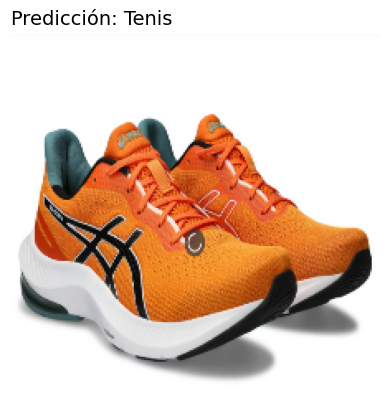

In [49]:
ruta = "/content/tenis1.PNG"
prediccion = categorizar(ruta)


1/1 [==============================] - 0s 35ms/step
Outdoor


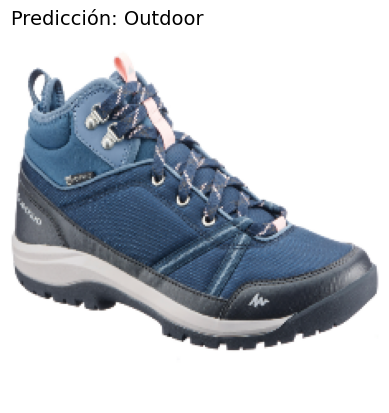

In [50]:
ruta = "/content/outdoor1.PNG"
prediccion = categorizar(ruta)
print(clases[prediccion])

1/1 [==============================] - 0s 24ms/step
Outdoor


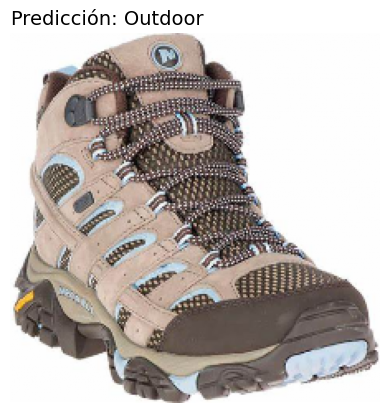

In [51]:
ruta = "/content/outdoor2.PNG"
prediccion = categorizar(ruta)
print(clases[prediccion])

1/1 [==============================] - 0s 32ms/step
Zapatilla


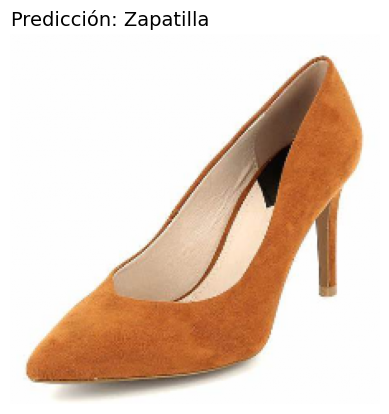

In [52]:
ruta = "/content/zapatilla1.PNG"
prediccion = categorizar(ruta)
print(clases[prediccion])